# Analise dos dados _Baseball Data_

Um estudo dos dados estatísticos do Major League Baseball de 1871 a 2014.
<img src="http://images.thesurge.com/app/uploads/2016/03/Baseball.jpg?x15124" width="300">

In [1]:
#carregando as bibliotecas e configurações a serem utilizadas.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from IPython.display import display

sns.set(style="darkgrid",palette="GnBu_d")
%matplotlib inline


### Jogadores de forma geral tem um bom custo/beneficio?

Hipotese: Dado que salário de jogadores normalmente tendem a refletir a fama dele por jogadas, sendo marcando pontos ou fazendo lances que necessitam de extremo dominio do esporte, nesta primeira analise farei uma regressão entre custo e desempenho de jogadores em relação as principais jogadas. Há uma tendecia entre os salários pagos e quantos jogadas/pontos os rebatedores marcam? O salário do jogador é justificado apenas pelo seu desempenho por jogadas?
Serão mencionados os salários medios do periodo e as jogadas no periodo.

In [2]:
dfcusto = pd.read_csv('core/Salaries.csv')
dfbenef = pd.read_csv('core/Batting.csv')

Olharemos primeiro os salários de uma forma geral.

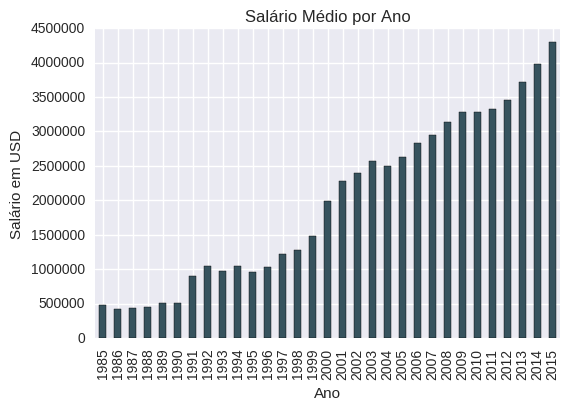

In [3]:
means = dfcusto.groupby("yearID")["salary"].mean()

fig, ax1 = plt.subplots()
means.plot.bar(ax=ax1)
plt.title(u'Salário Médio por Ano')
plt.xlabel('Ano')
plt.ylabel(u'Salário em USD')

Vemos que a partir do ano 2000 os salários tem maior variação, com isso pegaremos desse periodo.

###### Carregando e separando dados:
Através de uma consulta rápida obtive que as jogadas favoritas dos fãs de baseball são essas : 'Homeruns(HR)','Runs(R)','Hits(H)','Doubles(2B)','Triples(3B)','Stolen Bases(SB)'.
Assim separei-as para um dataframe as quais seriam avaliadas, após isso dividirei-as em jogadas por jogo, para ter uma resposta da média de jogadas para o jogador, para que jogadores que jogaram pouco naquele periodo tenha suas estatisticas balanceadas.

In [4]:
#organizando os dados
#descartando colunas desnecessárias
dfcusto.drop(['teamID','lgID'], axis=1, inplace=True)
dfbenef = dfbenef[['playerID','yearID','HR','R','H','2B','3B','SB','G']]
#obtendo apenas dados após 1999 (2000-2014)
dfcusto = dfcusto[dfcusto['yearID']>1999]
dfbenef = dfbenef[dfbenef['yearID']>1999]
#descarta jogadores que não jogaram aquele ano para evitar erros
dfbenef = dfbenef[dfbenef.G>0]
#printando
display(dfcusto.head(3))
display(dfbenef.head(3))

,yearID,playerID,salary
12263,2000,anderga01,3250000
12264,2000,belchti01,4600000
12265,2000,botteke01,4000000


,playerID,yearID,HR,R,H,2B,3B,SB,G
79248,abbotje01,2000,3.0,31.0,59.0,15.0,1.0,2.0,80
79249,abbotku01,2000,6.0,22.0,34.0,7.0,1.0,1.0,79
79250,abbotpa01,2000,0.0,1.0,2.0,1.0,0.0,0.0,35


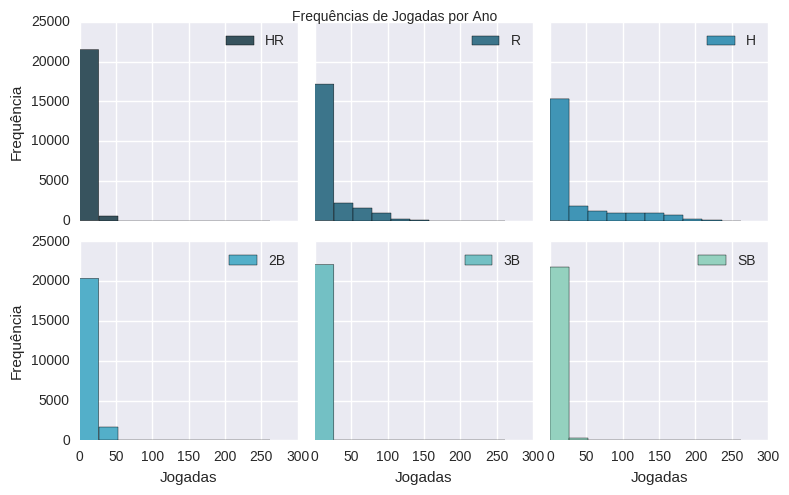

In [5]:
#plotando os dados de jogadas
axes = dfbenef[['HR','R','H','2B','3B','SB']].plot(kind='hist', figsize=(8, 5), subplots=True, layout=(2,3), sharey=True, title="Frequências de Jogadas por Ano")
axes[0,0].set_ylabel("Frequência")
axes[1,0].set_ylabel("Frequência")
axes[1,0].set_xlabel("Jogadas")
axes[1,1].set_xlabel("Jogadas")
axes[1,2].set_xlabel("Jogadas")
plt.tight_layout(w_pad=0.1, h_pad=0.5)

Vemos que a primeira barra é onde se concentram a maior quantidade de pontos, seguido por barras bem menores, a primeira vista creio que a primeira seja dado pelos atletas iniciantes/amadores/baixa divisão e as demais barras sejam onde ficam os atletas de ponta e super-estrelas do Baseball.

Agora criaremos as variaveis de média por jogo e após a media para o periodo (2000-2014), obtendo assim uma melhor descrição do desempenho do jogador.

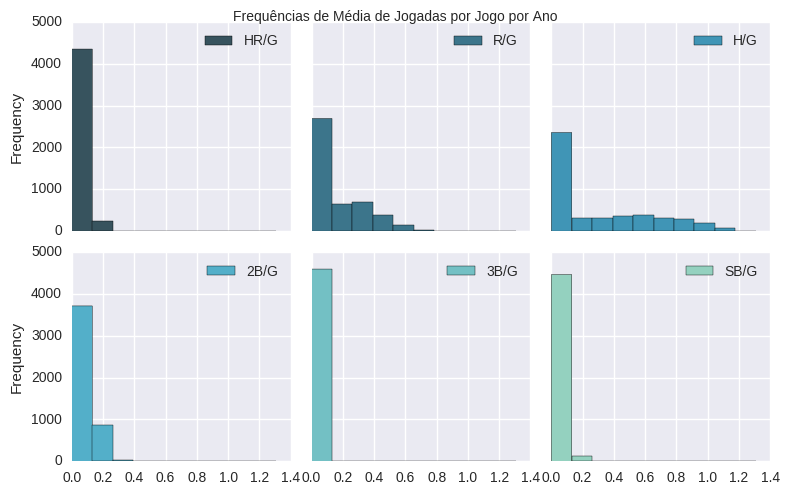

In [6]:
#obtém a média salarial para o periodo e define player id como index.
del dfcusto['yearID']
dfcusto = dfcusto.groupby('playerID').mean()

#obtém a média da -média de jogadas por jogo- para o periodo.
dfbenef[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']] = dfbenef[['HR','R','H','2B','3B','SB']].div(dfbenef.G, axis='index')
dfbenef.drop(['HR','R','H','2B','3B','SB','yearID','G'], axis=1, inplace=True)
dfbenef = dfbenef.groupby('playerID').mean()
#visualizando novamente
dfbenef[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']].plot(kind='hist', figsize=(8, 5), subplots=True,
                                                        layout=(2,3), sharey=True,
                                                        title="Frequências de Média de Jogadas por Jogo por Ano")
axes[0,0].set_ylabel("Frequência")
axes[1,0].set_ylabel("Frequência")
axes[1,0].set_xlabel("Jogadas")
axes[1,1].set_xlabel("Jogadas")
axes[1,2].set_xlabel("Jogadas")
plt.tight_layout(w_pad=0.1, h_pad=0.5)

Vemos que Hits por jogo e Runs por jogo estão tendendo mais a uma distribuição normal, permanecendo uma grande massa de jogadores com estatisticas muito próximas de zero. 

In [7]:
#une as tabelas pelo indice "playerID" e mantem apenas os valores existentes para os dois dataframes.
df = pd.merge(dfcusto,dfbenef,left_index=True,right_index=True,how='inner')
#Felizmente não temos nenhum valor faltando logo não precisaremos dessa parte do código.
"""
print(df.shape)
#descarta valores missing
df.dropna(inplace=True)
print(df.shape)
"""
df.head(3)

,salary,HR/G,R/G,H/G,2B/G,3B/G,SB/G
playerID,,,,,,,
aardsda01,1322821,0.0,0.000000,0.000000,0.0,0.0,0.0
abadan01,327000,0.0,0.037037,0.074074,0.0,0.0,0.0
abadfe01,629100,0.0,0.000000,0.004505,0.0,0.0,0.0


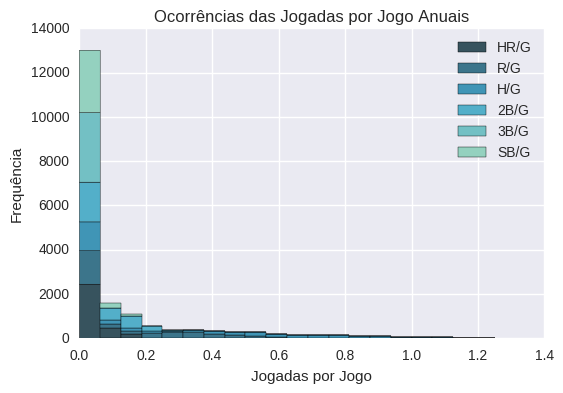

In [8]:
#analisando a distribuição
df[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']].plot.hist(stacked=True, bins=20)
plt.xlabel("Jogadas por Jogo")
plt.ylabel("Frequência")
plt.title("Ocorrências das Jogadas por Jogo Anuais")

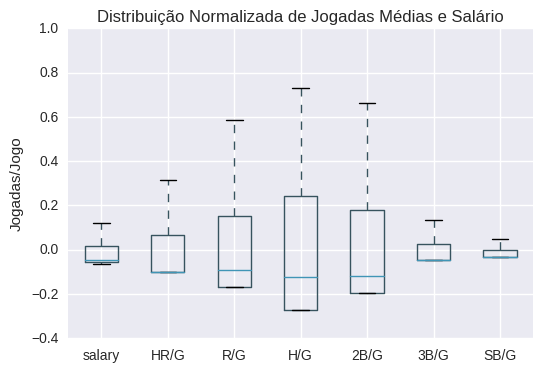

In [9]:
#normalizando os dados pelo desvio padrão
df = (df - df.mean()) / (df.max() - df.min())
#plotando o grafico de caixas para analise das variaveis
df.boxplot()
plt.title("Distribuição Normalizada de Jogadas Médias e Salário")
plt.ylabel("Jogadas/Jogo")

Podemos ver que as jogadas Hits, Doubles e Runs tem a maior variação entre os jogadores, assim focaremos nestas três jogadas para analisar a varição salarial

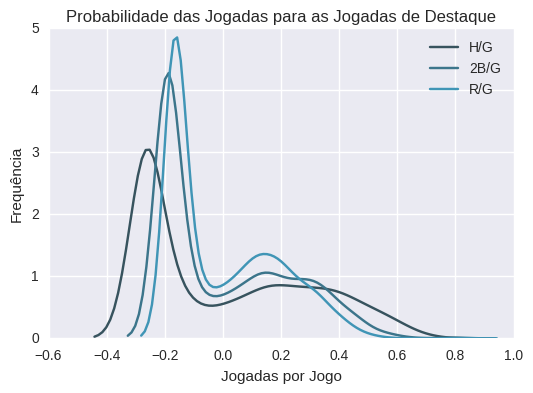

In [10]:
for x in ["H/G","2B/G","R/G"]:
    sns.kdeplot(df[x])
plt.title("Probabilidade das Jogadas para as Jogadas de Destaque")
plt.ylabel("Frequência")
plt.xlabel("Jogadas por Jogo")

Podemos ver que o gráfico segue uma distribuição binormal, reforçando a teoria de que existem grupos distintos de jogadores de alto nível e jogadores amadores no dataset. Tendo isso em mente e após uma pesquisa sobre as equipes que se encontram no dataset é comprovado que existem dois grupos em questão, tentaremos remover o primeiro grupo do dataset.

Veremos agora a relação entre salário e jogadas para os dois grupos, vamos resumir os dados para uma amostra de 500 jogadores e separa-los por acima da média e abaixo da média, em seguida plotaremos as duas relações entre salários e jogadas.

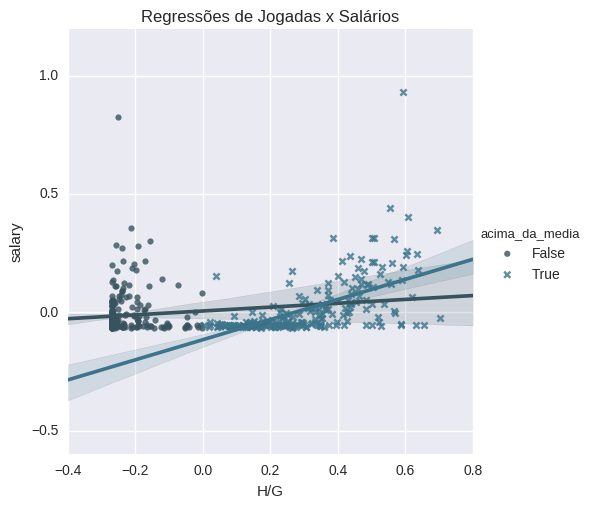

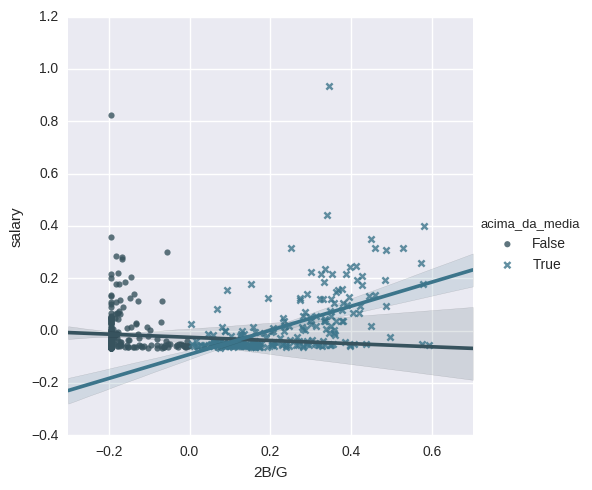

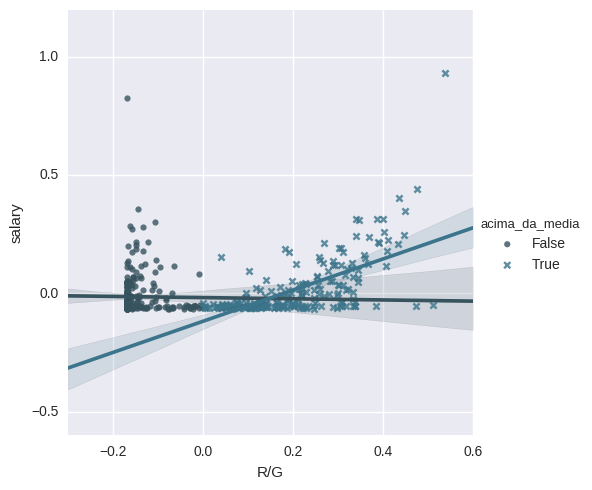

In [11]:
#resumindo os dados
dfresumo = df.sample(500)
dfresumo["acima_da_media"] = df["H/G"]>0
sns.lmplot(x="H/G", y="salary", hue="acima_da_media", data=dfresumo, markers=["o", "x"])
plt.title("Regressões de Jogadas x Salários")
dfresumo["acima_da_media"] = df["2B/G"]>0
sns.lmplot(x="2B/G", y="salary", hue="acima_da_media", data=dfresumo, markers=["o", "x"])
dfresumo["acima_da_media"] = df["R/G"]>0
sns.lmplot(x="R/G", y="salary", hue="acima_da_media", data=dfresumo, markers=["o", "x"])

Podemos observar que os jogadores abaixo da média tem grande impacto para o coeficiente da regressão, como não temos metodos mais ardilosos para retirar os jogadores amadores de forma simples do dataset, teremos que retirar todos os jogadores que estão com salários abaixo da média, presumindo que isso dê conta do recado.

'H/G = r_value: 0.04712, p_value: 0.5334, std_err: 0.02337'

'2B/G = r_value: 0.01417, p_value: 0.8515, std_err: 0.03002'

'R/G = r_value: 0.08857, p_value: 0.2411, std_err: 0.03305'

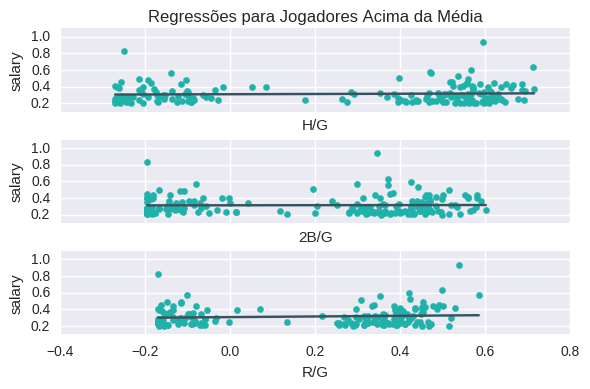

In [12]:
df02 = df[df["salary"]>0.2]
#nesta parte opto por plotar subgraficos para analisa-los em conjunto
f, ((ax1, ax2, ax3)) = plt.subplots(3, sharex='col', sharey='row')
#salvo os subgraficos em uma lista para que sejam acessados e configurados pelo loop
ax = [ax1,ax2,ax3]
#defino y como a variavel alvo, salario, para analisar em função de x (pontos) quais as influencias em y.
y = df02['salary']
ax1.set_title('Regressões para Jogadores Acima da Média')
for i,k in enumerate(['H/G','2B/G','R/G']):
    x = df02[k]
    ax[i].set_xlabel(k)
    ax[i].set_ylabel('salary')
    ax[i].scatter(x,y,marker='o',label=k,color='lightseagreen')
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    xl = np.linspace(x.min(),x.max(),2)
    yl = xl * slope + intercept
    ax[i].plot(xl,yl)
    #imprimo os coeficientes da reta
    display("{} = r_value: {:.4}, p_value: {:.4}, std_err: {:.4}".format(k,r_value, p_value, std_err))
    plt.tight_layout(h_pad=0.5)

Ainda que mantive 30% do quantil superior de salários, cerca de 30% dos maiores salários, ainda se mantem a distribuição binormal que eu acreditava ser dada pelos jogadores amadores de divisões mais baixas.n

O que derruba a hipotese inicial, mas vamos dar uma olhada mais a fundo nos 20 jogadores mais bem pagos do Baseball americano.

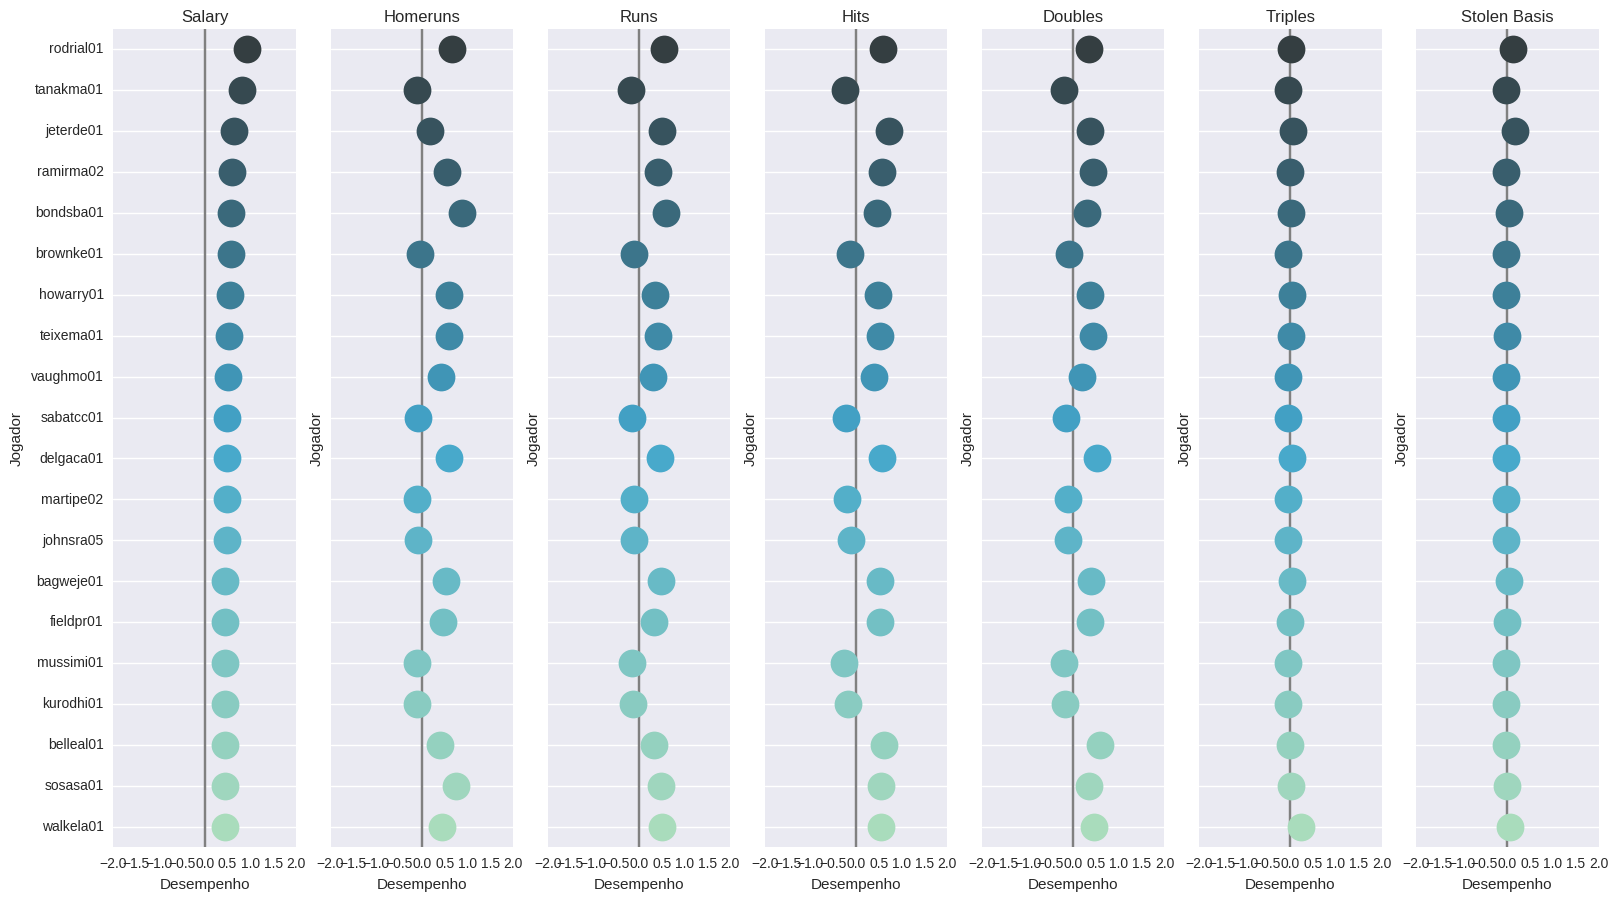

In [13]:
top20 = df.sort_values("salary", ascending=False).head(20)
top20['playerID'] = top20.index
# Controi um PairGrid
g = sns.PairGrid(top20,
                 x_vars=top20.columns[:-1], y_vars=["playerID"],
                 size=9, aspect=.25)
g.map(sns.stripplot, size=20, orient="h",
      palette="GnBu_d", edgecolor="black")
g.set(xlim=(-2, 2), xlabel="Desempenho", ylabel="Jogador")
titles = ["Salary", "Homeruns","Runs","Hits","Doubles", "Triples","Stolen Basis"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.axvline(x=0,color='gray')
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

***Conclusão:*** Através da analise dos gráficos de regressão acima podemos ver que sendo x o número de jogadas e y o salário, separadamente essas jogadas não demonstram que tem influência importante ao salário dos jogadores.
Também os 20 mais remunerados se destacam apenas um pouco da média para alguns pontos e em outros tem desempenho pior que a média.

Desta forma os salários dos jogadores não podem ser explicados apenas pelo seu desempenho em jogadas, talvez seja pela soma de todas elas e mais variáveis ocultas, podendo ser jogadas memoraveis ou demais estrelismos[1], que não são mencionados por esses dados.

Para uma pequisa mais precisa talvez sejam necessários dados mais subjetivos, coisas até como carisma do jogador podem ser capazes de influênciar no salário de um jogador.

[1]Como no futebol que os jogadores mais bem pagos não necessariamente marcam mais gols, mas sim o estrelismo deles, como dribles e disputas que tornam esses jogadores mais notaveis.

###### Referências:
[The Real Lessons of Moneyball](https://www.bloomberg.com/news/articles/2011-10-20/the-real-lessons-of-moneyball)

[The econometrics of baseball: A statistical investigation - Keener, Mary Hilston](http://connection.ebscohost.com/c/articles/94600994/econometrics-baseball-statistical-investigation)